# **Feature Engineering**
We have been provided with a loan default prediction data set from a finance company in the United
States. The data provided contain information on previous loan applicants and whether they ‘defaulted’
or not. The aim is to identify patterns that indicate if a person is likely to default, which may be used for
taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a
higher interest rate, etc. Features, also known as variables, include credit scores, the quantity of financing
queries, address details such as zip codes and states, and collections, among other factors. The data set is a matrix of around 860,000 observations
and 150 variables. Note that there are missing values, outliers, and features of multiple data types.





## **1. Data learning and understanding**



In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt


train_data = pd.read_csv("train.csv")
valid_data = pd.read_csv("valid.csv")
test_data = pd.read_csv("X_test.csv")

train_data.dropna(subset=['loan_status'], inplace=True)
valid_data.dropna(subset=['loan_status'], inplace=True)

In [ ]:
train_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status
0,NaN,NaN,14000,14000,14000.0,36 months,7.35,434.53,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,2000,2000,2000.0,36 months,16.29,70.61,D,D2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,5000,5000,4750.0,36 months,7.39,155.28,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,20600,20600,20600.0,36 months,11.99,684.12,B,B5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,10000,10000,10000.0,36 months,7.39,310.56,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1


## **2. Data Preprocessing**


In [ ]:
#Seperate features and target variables
y_train = train_data['loan_status']
X_train = train_data.drop(columns=['loan_status'])

y_valid = valid_data['loan_status']
X_valid = valid_data.drop(columns=['loan_status'])

**1. Feature removal**

Feature selection involves choosing the most relevant features for your model and removing irrelevant or redundant ones. In this model I have dropped the columns where there are more than **50%** of missing values in their columns. And also I have dropped the columns which have the same value for the all records.

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentages = (X_train.isnull().sum() / len(X_train)) * 100

# Filter out columns with more than 80% missing values
columns_to_drop_1 = missing_percentages[missing_percentages > 50].index

# Drop the identified columns from the dataset
X_train = X_train.drop(columns=columns_to_drop_1)
X_valid = X_valid.drop(columns=columns_to_drop_1)
X_test = test_data.drop(columns=columns_to_drop_1)

# Print the columns dropped
print("Columns dropped due to more than 50% missing values:", columns_to_drop_1)
print("Shape of the trained data: ", X_train.shape)


# Assuming train_data is your DataFrame
columns_to_drop_2 = X_train.columns[X_train.nunique() == 1]

# Drop columns with all the same values
X_train = X_train.drop(columns=columns_to_drop_2)
X_valid = X_valid.drop(columns=columns_to_drop_2)
X_test = X_test.drop(columns=columns_to_drop_2)

# Print the columns dropped
print("Columns dropped due to having the same value:", columns_to_drop_2)
print("Shape of the trained data: ", X_train.shape)


Columns dropped due to more than 50% missing values: Index(['id', 'member_id', 'url', 'desc', 'mths_since_last_delinq',
       'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'revol_bal_joint',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'har

In [ ]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,14000,14000,14000.0,36 months,7.35,434.53,A,A4,Paralegal,1 year,...,100.0,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,Cash,N
1,2000,2000,2000.0,36 months,16.29,70.61,D,D2,NaN,NaN,...,93.7,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,Cash,N
2,5000,5000,4750.0,36 months,7.39,155.28,A,A4,owner,4 years,...,100.0,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,Cash,N
3,20600,20600,20600.0,36 months,11.99,684.12,B,B5,NaN,NaN,...,91.2,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,Cash,N
4,10000,10000,10000.0,36 months,7.39,310.56,A,A4,Senior UX designer,< 1 year,...,97.0,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,Cash,N


**2. Categorizing numerical features and categorical features.**

In [ ]:
# Identify numerical and categorical(nominal and ordinal) features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns     #Numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns   #categorical nominal featurestures.shape)
categorical = categorical_features

print(numeric_features.shape)

(62,)


**3.Imputing missing values using median and mode**

In [ ]:
#impute missing values for numerical columns
X_train[numeric_features] = X_train[numeric_features].fillna(X_train[numeric_features].mean())
X_valid[numeric_features] = X_valid[numeric_features].fillna(X_valid[numeric_features].mean())
X_test[numeric_features] = X_test[numeric_features].fillna(X_test[numeric_features].mean())

#impute missing values for categorical columns
X_train[categorical_features] = X_train[categorical_features].fillna(X_train[categorical_features].mode().iloc[0])
X_valid[categorical_features] = X_valid[categorical_features].fillna(X_valid[categorical_features].mode().iloc[0])
X_test[categorical_features] = X_test[categorical_features].fillna(X_test[categorical_features].mode().iloc[0])

#check for missing values
X_train.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
                             ..
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
disbursement_method           0
debt_settlement_flag          0
Length: 81, dtype: int64

In [ ]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,14000,14000,14000.0,36 months,7.35,434.53,A,A4,Paralegal,1 year,...,100.0,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,Cash,N
1,2000,2000,2000.0,36 months,16.29,70.61,D,D2,Teacher,10+ years,...,93.7,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,Cash,N
2,5000,5000,4750.0,36 months,7.39,155.28,A,A4,owner,4 years,...,100.0,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,Cash,N
3,20600,20600,20600.0,36 months,11.99,684.12,B,B5,Teacher,10+ years,...,91.2,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,Cash,N
4,10000,10000,10000.0,36 months,7.39,310.56,A,A4,Senior UX designer,< 1 year,...,97.0,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,Cash,N


**4. Binary Encoding, One hot encoding, Target encoding, Label encoding, Ordinal encoding**

In [ ]:
#drop the grade column
X_train = X_train.drop('grade', axis=1)
X_valid = X_valid.drop('grade', axis=1)
X_test = X_test.drop('grade', axis=1)

#delete grade column from categorical features
categorical_features = categorical_features.drop('grade')

In [ ]:
#get number of  unique values in all categorical columns
unique_values = X_train[categorical_features].nunique()
unique_values

term                         2
sub_grade                   35
emp_title               175168
emp_length                  11
home_ownership               6
verification_status          3
issue_d                    138
purpose                     14
title                    27117
zip_code                   909
addr_state                  51
earliest_cr_line           709
initial_list_status          2
last_pymnt_d               133
last_credit_pull_d         132
application_type             2
disbursement_method          2
debt_settlement_flag         2
dtype: int64

In [ ]:
#get ordinal encoding for sub_grade column using sklearn
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X_train['sub_grade'] = encoder.fit_transform(X_train['sub_grade'].values.reshape(-1,1))
X_valid['sub_grade'] = encoder.transform(X_valid['sub_grade'].values.reshape(-1,1))
X_test['sub_grade'] = encoder.transform(X_test['sub_grade'].values.reshape(-1,1))
X_train['sub_grade']

#drop sub_grade column from cat_cols
categorical_features = categorical_features.drop('sub_grade')


In [ ]:
# encode columns that have 2 unique values
X_train['term'] = X_train['term'].map({' 36 months': 0, ' 60 months': 1})
X_train['application_type'] = X_train['application_type'].map({'Individual': 0, 'Joint App': 1})
X_train['initial_list_status'] = X_train['initial_list_status'].map({'w': 0, 'f': 1})
X_train['disbursement_method'] = X_train['disbursement_method'].map({'Cash': 0, 'DirectPay': 1})
X_train['debt_settlement_flag'] = X_train['debt_settlement_flag'].map({'N': 0, 'Y': 1})

X_valid['term'] = X_valid['term'].map({' 36 months': 0, ' 60 months': 1})
X_valid['application_type'] = X_valid['application_type'].map({'Individual': 0, 'Joint App': 1})
X_valid['initial_list_status'] = X_valid['initial_list_status'].map({'w': 0, 'f': 1})
X_valid['disbursement_method'] = X_valid['disbursement_method'].map({'Cash': 0, 'DirectPay': 1})
X_valid['debt_settlement_flag'] = X_valid['debt_settlement_flag'].map({'N': 0, 'Y': 1})

X_test['term'] = X_test['term'].map({' 36 months': 0, ' 60 months': 1})
X_test['application_type'] = X_test['application_type'].map({'Individual': 0, 'Joint App': 1})
X_test['initial_list_status'] = X_test['initial_list_status'].map({'w': 0, 'f': 1})
X_test['disbursement_method'] = X_test['disbursement_method'].map({'Cash': 0, 'DirectPay': 1})
X_test['debt_settlement_flag'] = X_test['debt_settlement_flag'].map({'N': 0, 'Y': 1})



In [ ]:
X_train[['term','application_type', 'initial_list_status', 'disbursement_method', 'debt_settlement_flag']]

,term,application_type,initial_list_status,disbursement_method,debt_settlement_flag
0,0,0,1,0,0
1,0,0,0,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,0
...,...,...,...,...,...
517783,0,0,1,0,0
517784,0,0,1,0,0
517785,1,0,1,0,0
517786,0,0,1,0,0


In [ ]:
X_valid[['term','application_type', 'initial_list_status', 'disbursement_method', 'debt_settlement_flag']]

,term,application_type,initial_list_status,disbursement_method,debt_settlement_flag
0,1,0,1,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
172591,0,1,1,0,0
172592,0,0,0,0,0
172593,0,0,0,0,0
172594,0,0,0,0,0


In [ ]:
#drop 2 unique value columns from cat_cols
categorical_features = categorical_features.drop(['application_type', 'initial_list_status', 'disbursement_method', 'debt_settlement_flag','term'])


In [ ]:
categorical_features

Index(['emp_title', 'emp_length', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

In [ ]:
# Convert all string columns to lowercase
X_train['emp_title'] = X_train['emp_title'].str.lower()
X_train['title'] = X_train['title'].str.lower()
X_train['addr_state'] = X_train['addr_state'].str.lower()
X_train['zip_code'] = X_train['zip_code'].str.lower()

# Perform target encoding
encoder = ce.TargetEncoder(cols=['emp_title', 'title', 'addr_state', 'zip_code'])
X_train = encoder.fit_transform(X_train, y_train)
X_valid = encoder.transform(X_valid)
X_test = encoder.transform(X_test)

In [ ]:
X_train['emp_title']

0         0.645924
1         0.641054
2         0.619686
3         0.641054
4         0.747733
            ...   
517783    0.606141
517784    0.578328
517785    0.606141
517786    0.736249
517787    0.769080
Name: emp_title, Length: 517788, dtype: float64

In [ ]:
#drop emp_title, title, addr_state and zip_code from cat_cols
categorical_features = categorical_features.drop(['emp_title', 'title', 'zip_code', 'addr_state'])
categorical_features

Index(['emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

In [ ]:
#label encode for emp_length , home_ownership, and  purpose
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
X_train['emp_length'] = lencoder.fit_transform(X_train['emp_length'])
X_valid['emp_length'] = lencoder.transform(X_valid['emp_length'])
X_test['emp_length'] = lencoder.transform(X_test['emp_length'])

X_train['home_ownership'] = lencoder.fit_transform(X_train['home_ownership'])
X_valid['home_ownership'] = lencoder.transform(X_valid['home_ownership'])
X_test['home_ownership'] = lencoder.transform(X_test['home_ownership'])

X_train['purpose'] = lencoder.fit_transform(X_train['purpose'])
X_valid['purpose'] = lencoder.transform(X_valid['purpose'])
X_test['purpose'] = lencoder.transform(X_test['purpose'])

X_train[['emp_length', 'home_ownership', 'purpose']]


,emp_length,home_ownership,purpose
0,0,1,2
1,1,1,2
2,4,1,1
3,1,1,2
4,10,1,1
...,...,...,...
517783,3,5,7
517784,4,1,2
517785,1,1,2
517786,1,1,2


In [ ]:
#drop emp_length, home_ownership, and  purpose from cat_cols
categorical_features = categorical_features.drop(['emp_length', 'home_ownership', 'purpose'])

In [ ]:
X_train['verification_status']

0            Not Verified
1                Verified
2            Not Verified
3         Source Verified
4         Source Verified
               ...       
517783           Verified
517784    Source Verified
517785    Source Verified
517786           Verified
517787    Source Verified
Name: verification_status, Length: 517788, dtype: object

In [ ]:
#one hot encode to verification_status using sklearn
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
verification_status = encoder.fit_transform(X_train['verification_status'].values.reshape(-1,1)).toarray()
verification_status = pd.DataFrame(verification_status, columns = ['verification_status_' + str(int(i)) for i in range(verification_status.shape[1])])
X_train = pd.concat([X_train, verification_status], axis=1)
X_train = X_train.drop('verification_status', axis=1)

verification_status = encoder.transform(X_valid['verification_status'].values.reshape(-1,1)).toarray()
verification_status = pd.DataFrame(verification_status, columns = ['verification_status_' + str(int(i)) for i in range(verification_status.shape[1])])
X_valid = pd.concat([X_valid, verification_status], axis=1)
X_valid = X_valid.drop('verification_status', axis=1)

verification_status = encoder.transform(X_test['verification_status'].values.reshape(-1,1)).toarray()
verification_status = pd.DataFrame(verification_status, columns = ['verification_status_' + str(int(i)) for i in range(verification_status.shape[1])])
X_test = pd.concat([X_test, verification_status], axis=1)
X_test = X_test.drop('verification_status', axis=1)


In [ ]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,verification_status_0,verification_status_1,verification_status_2
0,14000,14000,14000.0,0,7.35,434.53,3.0,0.645924,0,1,...,1.0,67943.0,23659.0,13600.0,48043.0,0,0,1.0,0.0,0.0
1,2000,2000,2000.0,0,16.29,70.61,16.0,0.641054,1,1,...,0.0,9800.0,4168.0,1300.0,0.0,0,0,0.0,0.0,1.0
2,5000,5000,4750.0,0,7.39,155.28,3.0,0.619686,4,1,...,0.0,237800.0,20061.0,64200.0,21600.0,0,0,1.0,0.0,0.0
3,20600,20600,20600.0,0,11.99,684.12,9.0,0.641054,1,1,...,0.0,105100.0,12355.0,15300.0,0.0,0,0,0.0,1.0,0.0
4,10000,10000,10000.0,0,7.39,310.56,3.0,0.747733,10,1,...,1.0,135735.0,141874.0,12000.0,123535.0,0,0,0.0,1.0,0.0


In [ ]:
#drop date columns
X_train = X_train.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d',  'last_credit_pull_d'], axis=1)
X_valid = X_valid.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d',  'last_credit_pull_d'], axis=1)
X_test = X_test.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d',  'last_credit_pull_d'], axis=1)

#drop date columns from cat_cols
categorical_features = categorical_features.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d',  'last_credit_pull_d'])


In [ ]:
X_train.shape

(517788, 78)

In [ ]:
numeric_features.shape

(62,)

In [ ]:
import xgboost as xgb

# Define XGBoost model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict on validation data
y_pred = model.predict(X_valid)

In [ ]:
y_train.shape

(517788,)

**5. Mutual Information**

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = X_train.copy(), X_valid.copy(), y_train.copy(), y_valid.copy()

In [ ]:
print("X_train_1 shape:", X_train_1.shape)
print("X_test_1 shape:", X_test_1.shape)
print("y_train_1 shape:", y_train_1.shape)
print("y_test_1 shape:", y_test_1.shape)


X_train_1 shape: (517788, 78)
X_test_1 shape: (172596, 78)
y_train_1 shape: (517788,)
y_test_1 shape: (172596,)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

accuracy_score_list = []

for k in range(1,20):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train_1, y_train_1)

    X_train_2 = selector.transform(X_train_1)
    X_test_2 = selector.transform(X_test_1)

    model.fit(X_train_2, y_train_1)
    preds = model.predict(X_test_2)

    accuracy = accuracy_score(y_test_1, preds)

    accuracy_score_list.append(accuracy)
    print(accuracy)

0.8783691394933834
0.9522700410206494
0.9707177454865697
0.9707177454865697
0.9697617557764954
0.9863728012236669
0.9865582052886509
0.9856369788407611
0.9920508007138057
0.9925548680154812
0.9934529189552481
0.998470416463881
0.99853994298825
0.9983487450462352
0.998424065447635
0.998516767480127
0.9985573246193423
0.9987137592991726
0.9986616144058958


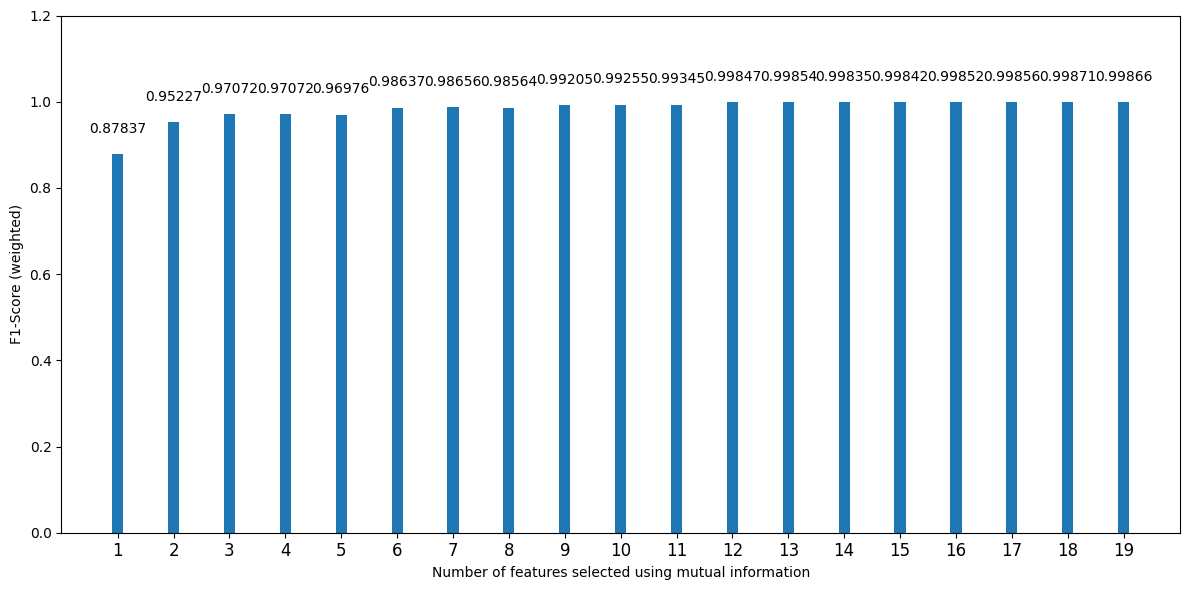

In [ ]:
import numpy as np

fig, ax = plt.subplots(figsize=(12,6))

accuracy_score_list = [round(i,5) for i in accuracy_score_list]
x = np.arange(1,20)
y = accuracy_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0,1.2)
ax.set_xticks(np.arange(1,20))
ax.set_xticklabels(np.arange(1,20), fontsize=12)

for i,v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')

plt.tight_layout()

In [ ]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,verification_status_0,verification_status_1,verification_status_2
0,14000,14000,14000.0,0,7.35,434.53,3.0,0.645924,0,1,...,1.0,67943.0,23659.0,13600.0,48043.0,0,0,1.0,0.0,0.0
1,2000,2000,2000.0,0,16.29,70.61,16.0,0.641054,1,1,...,0.0,9800.0,4168.0,1300.0,0.0,0,0,0.0,0.0,1.0
2,5000,5000,4750.0,0,7.39,155.28,3.0,0.619686,4,1,...,0.0,237800.0,20061.0,64200.0,21600.0,0,0,1.0,0.0,0.0
3,20600,20600,20600.0,0,11.99,684.12,9.0,0.641054,1,1,...,0.0,105100.0,12355.0,15300.0,0.0,0,0,0.0,1.0,0.0
4,10000,10000,10000.0,0,7.39,310.56,3.0,0.747733,10,1,...,1.0,135735.0,141874.0,12000.0,123535.0,0,0,0.0,1.0,0.0


In [ ]:
# I get 18 best features using mutual information
select_k_best = SelectKBest(score_func=mutual_info_classif, k=18)

#fit the model
fit_model_last = select_k_best.fit(X_train, y_train)

#get the best features
select_feature_mask = fit_model_last.get_support()

selected_features = X_train.columns[select_feature_mask]

selected_features


Index(['term', 'int_rate', 'installment', 'sub_grade', 'emp_title',
       'home_ownership', 'title', 'initial_list_status', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'debt_settlement_flag', 'verification_status_1'],
      dtype='object')

In [ ]:
#delete columns that are not in the selected features
X_train_v2 = X_train[selected_features]
X_valid_v2 = X_valid[selected_features]
test_df_v2 = X_test[selected_features]

In [ ]:
#get the new new xgboost model
model.fit(X_train_v2, y_train)

#make predictions
y_pred_v2 = model.predict(X_valid_v2)

#calculate accuracy
accuracy_v2 = accuracy_score(y_valid, y_pred_v2)
print('Accuracy with advanced feature engineering techniques: %.2f%%' % (accuracy_v2 * 100.0))


Accuracy with advanced feature engineering techniques: 99.87%


**6. Feature crossing using correlation matrix**

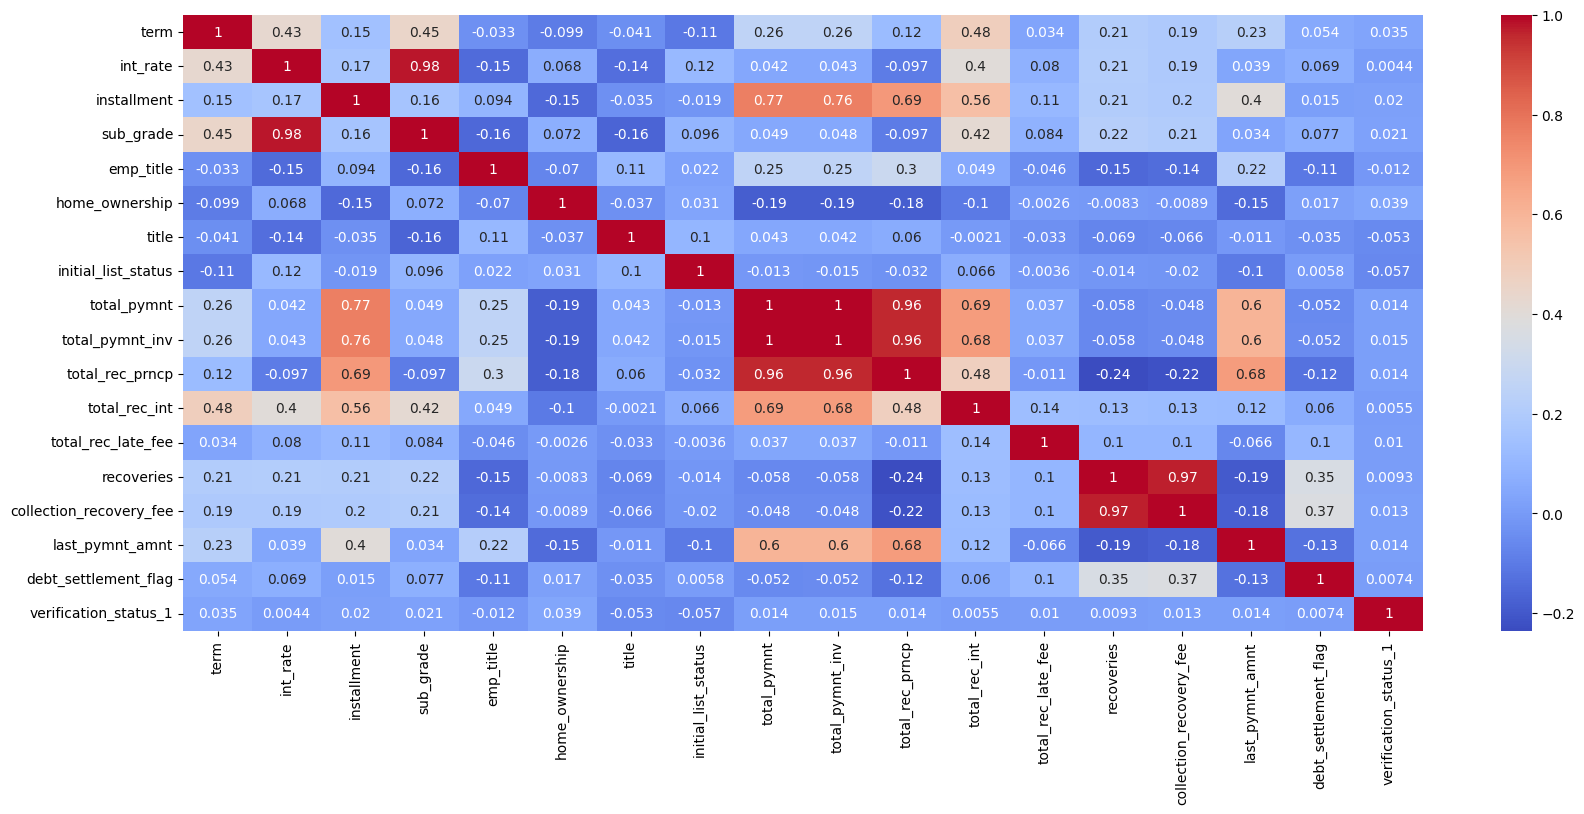

In [ ]:
#get correlation matrix
corr_matrix = X_train_v2.corr()

#plot the correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#delete columns that are highly correlated
X_train_v3 = X_train_v2.drop(['sub_grade' ], axis=1)
X_valid_v3 = X_valid_v2.drop(['sub_grade' ], axis=1)
test_df_v3 = test_df_v2.drop(['sub_grade'], axis=1)

In [ ]:
#add feature crossing to the model
X_train_v3['total_pymnt_inv / total_pymnt'] = X_train_v3['total_pymnt_inv'] / X_train_v3['total_pymnt']
X_valid_v3['total_pymnt_inv / total_pymnt'] = X_valid_v3['total_pymnt_inv'] / X_valid_v3['total_pymnt']
test_df_v3['total_pymnt_inv / total_pymnt'] = test_df_v3['total_pymnt_inv'] / test_df_v3['total_pymnt']

#drop total_pymnt_inv and total_pymnt columns
X_train_v3 = X_train_v3.drop(['total_pymnt_inv', 'total_pymnt'], axis=1)
X_valid_v3 = X_valid_v3.drop(['total_pymnt_inv', 'total_pymnt'], axis=1)
test_df_v3 = test_df_v3.drop(['total_pymnt_inv', 'total_pymnt'], axis=1)

X_train_v3['total_pymnt_inv / total_pymnt'].head()



0    1.000000
1    0.999998
2    0.950000
3    1.000000
4    1.000000
Name: total_pymnt_inv / total_pymnt, dtype: float64

## **3.Modelling and evaluating**

In [ ]:
#train the model
model.fit(X_train_v3, y_train)

#make predictions
y_pred = model.predict(X_valid_v3)

#calculate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy with advanced feature engineering techniques: %.2f%%' % (accuracy * 100.0))

Accuracy with advanced feature engineering techniques: 99.91%


In [ ]:
#predict on the test set
y_test = model.predict(test_df_v3)
y_test

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
#convert the predictions to a dataframe
y_test_df = pd.DataFrame(y_test, columns=['loan_status'])
y_test_df.head()

,loan_status
0,1
1,0
2,1
3,1
4,0


In [ ]:
#concatenate the predictions with the test set
test_df_final = pd.concat([y_test_df,test_df_v3], axis=1)
test_df_final.head()

,loan_status,term,int_rate,installment,emp_title,home_ownership,title,initial_list_status,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,debt_settlement_flag,verification_status_1,total_pymnt_inv / total_pymnt
0,1,0,11.47,267.00,0.696801,5,0.696801,0,8100.00,46.46,0.0,0.00,0.0000,8151.62,0,1.0,1.000
1,0,0,12.99,336.90,0.696801,4,0.696801,0,693.40,310.08,0.0,963.06,173.3508,336.90,0,1.0,1.000
2,1,0,13.67,321.47,0.696801,1,0.696801,0,9450.00,878.80,0.0,0.00,0.0000,7757.04,0,0.0,1.000
3,1,0,17.49,897.43,0.696801,1,0.696801,1,25000.00,7307.33,0.0,0.00,0.0000,946.48,0,0.0,0.999
4,0,1,14.99,380.56,0.696801,1,0.696801,0,6268.46,4754.46,0.0,1346.04,242.2872,380.56,0,0.0,1.000


In [ ]:
#get csv file
test_df_final.to_csv('210711T.csv', index=False)

## **4. SHAP analysis**

Shap values show how much a given feature changed our prediction (compared to if we made that prediction at some baseline value of that feature).

In [ ]:
import shap
shap.initjs()

In [ ]:
#Get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X_train_v3)

In [ ]:
np.shape(shap_values.values)

(517788, 16)

**1.waterfall plot and force plot**

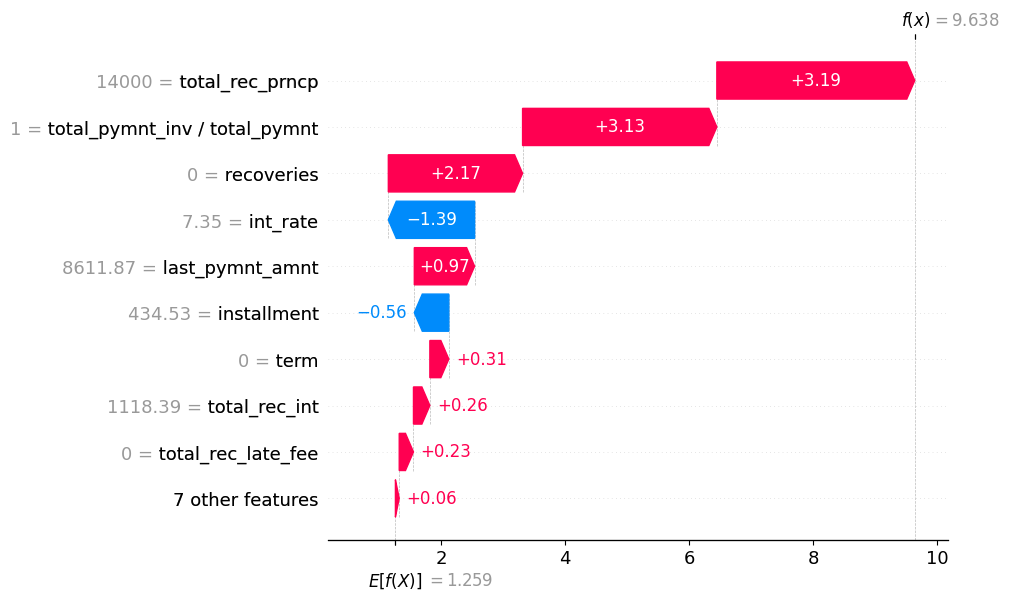

In [ ]:
#waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.plots.force(shap_values[0])

Here the graph show how each feature contributes on the first observation.For an example recoveries contribute 2.17 positively to the 1st prediction.

**2.Stacked force plot**

In [ ]:
shap.plots.force(shap_values[0:100])

This grapgh has combined multiple force plots to gether to get a general idea.

**3.Absolute Mean SHAP**

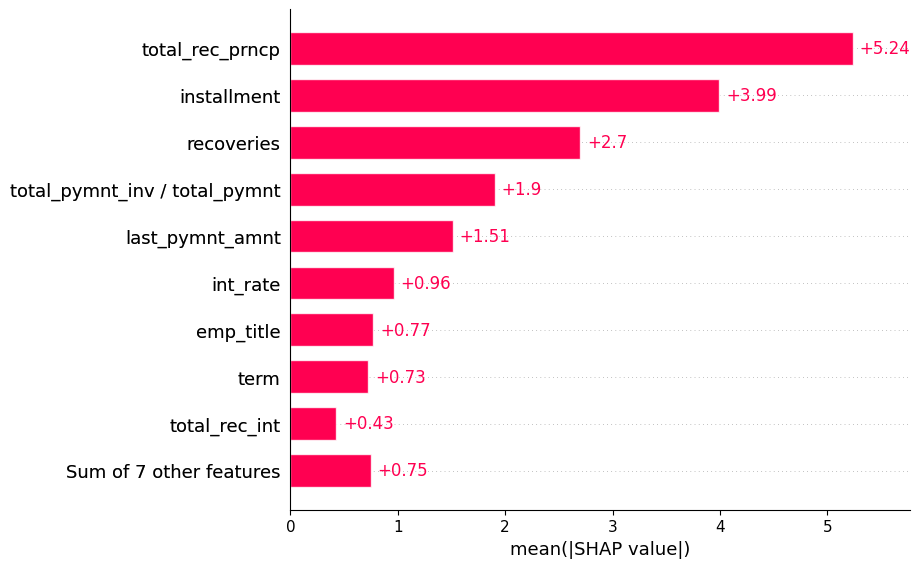

In [ ]:
shap.plots.bar(shap_values)

This gives the absolute mean of shap values. From this grapg we can depict the importance of the features to predict the model.

**4.Beeswarm plot**

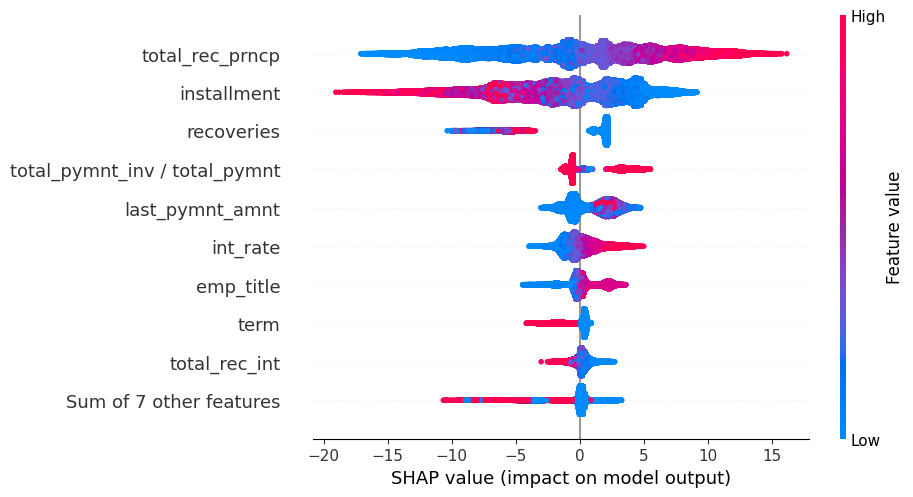

In [ ]:
shap.plots.beeswarm(shap_values)

This is a visualization of all shap values.

**4.Dependence plots**

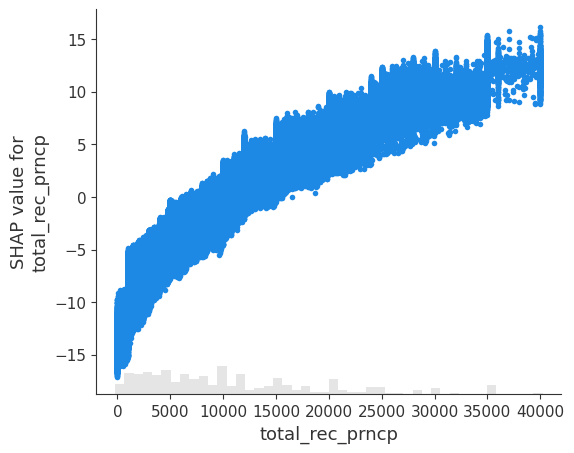

In [ ]:
shap.plots.scatter(shap_values[:, "total_rec_prncp"])